## FIGARCH Model

Fractional Integrated Generalized Auto Regressive Conditional Heteroscedasticity Model

$$h_t = w + \left[ 1 - \beta L  - \phi L(1-L)^d \right] \epsilon_t^2 + \beta h_{t-1}$$

여기서 L은 시차를 나타내는 기호이고, d는 실수인 차분 파라미터이다. arch의 FIGARCH모형에서는 d를 추정한다. 이 모형은 $\mathrm{ARCH}(\infty)$ 모형을 이용해서 추정할 수 있다

$$h_t = (1 - \beta)^{-1} w + \sum_{i=1}^\infty \lambda_i \epsilon_{t-i}^2$$

가중치는 다음과 같이 재귀적 알고리즘을 이용해 구축된다

$$\delta_1 = d$$
$$\lambda_1 = d - \beta + \phi$$

$$\delta_j = \frac{j-1-d}{j} \delta_{j-1}$$
$$\lambda_j = \beta \lambda_{j-1} + \beta_j - \phi \delta_{j-1}$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import arch

start_date = '2000-01-01'
end_date = '2024-05-01'
ticker = 'AAPL'
data = yf.download(
    ticker, 
    start = start_date, 
    end = end_date
)

[*********************100%%**********************]  1 of 1 completed


FIGARCH모형은 fracdiff model과 달리 arch model에 준비되어 있다. 이는 최근에 이뤄진 업데이트로, parameter `power`를 통해서 조정해줄 수 있다

In [32]:
returns = data[['Adj Close']].pct_change().dropna() * 100
figarch = arch.arch_model(
    returns, 
    vol = 'FIGARCH', 
    p = 1, 
    q = 1, 
    power = 0.1
)
garch = arch.arch_model(
    returns, 
    vol = 'GARCH', 
    p = 1, 
    q = 1
)

In [33]:
figarch_fit = figarch.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 116799.20910510246
Iteration:      2,   Func. Count:     23,   Neg. LLF: 147110.3283747774
Iteration:      3,   Func. Count:     35,   Neg. LLF: 28518.538637600283
Iteration:      4,   Func. Count:     51,   Neg. LLF: 30986.22961223552
Iteration:      5,   Func. Count:     67,   Neg. LLF: 49982.701372787196
Iteration:      6,   Func. Count:     74,   Neg. LLF: 6335249846420937.0
Iteration:      7,   Func. Count:     87,   Neg. LLF: 89530.67070538514
Iteration:      8,   Func. Count:    103,   Neg. LLF: 1787476489797.188
Iteration:      9,   Func. Count:    112,   Neg. LLF: 50193.24537099146
Iteration:     10,   Func. Count:    119,   Neg. LLF: 98020351751.04951
Iteration:     11,   Func. Count:    126,   Neg. LLF: 54575.497670957746
Iteration:     12,   Func. Count:    138,   Neg. LLF: 17706203683.88499
Iteration:     13,   Func. Count:    145,   Neg. LLF: 2787449999.412756
Iteration:     14,   Func. Count:    153,   Neg. LLF: 16295

In [34]:
figarch_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
               Constant Mean - Power FIGARCH (power: 0.1) Model Results               
======================================================================================
Dep. Variable:                      Adj Close   R-squared:                       0.000
Mean Model:                     Constant Mean   Adj. R-squared:                  0.000
Vol Model:         Power FIGARCH (power: 0.1)   Log-Likelihood:               -13496.4
Distribution:                          Normal   AIC:                           27002.9
Method:                    Maximum Likelihood   BIC:                           27036.5
                                                No. Observations:                 6119
Date:                        Mon, May 06 2024   Df Residuals:                     6118
Time:                                01:07:09   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.7837  5.798e-04   1351.516      0.000 [  0.783,  0.785]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0697  1.590e-02      4.384  1.165e-05 [3.855e-02,  0.101]
phi            0.3153  3.316e-02      9.507  1.956e-21   [  0.250,  0.380]
d              0.3542  3.921e-02      9.032  1.693e-19   [  0.277,  0.431]
beta           0.6059  4.117e-02     14.716  5.114e-49   [  0.525,  0.687]
==========================================================================

Covariance estimator: robust
"""

대표적인 이분산 모형 GARCH와 성능을 비교해 보자

In [35]:
garch_fit = garch.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2335474.9977649786
Iteration:      2,   Func. Count:     15,   Neg. LLF: 16448.27569931007
Iteration:      3,   Func. Count:     21,   Neg. LLF: 13294.488458333713
Iteration:      4,   Func. Count:     27,   Neg. LLF: 13269.363010241104
Iteration:      5,   Func. Count:     33,   Neg. LLF: 13200.848582319568
Iteration:      6,   Func. Count:     39,   Neg. LLF: 13643.618327016447
Iteration:      7,   Func. Count:     46,   Neg. LLF: 13205.375119991944
Iteration:      8,   Func. Count:     52,   Neg. LLF: 13194.452424252811
Iteration:      9,   Func. Count:     58,   Neg. LLF: 13194.210327604362
Iteration:     10,   Func. Count:     63,   Neg. LLF: 13194.210065294781
Iteration:     11,   Func. Count:     67,   Neg. LLF: 13194.210065294157
Optimization terminated successfully    (Exit mode 0)
            Current function value: 13194.210065294781
            Iterations: 11
            Function evaluations: 67
            Gradient eval

In [36]:
garch_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -13194.2
Distribution:                  Normal   AIC:                           26396.4
Method:            Maximum Likelihood   BIC:                           26423.3
                                        No. Observations:                 6119
Date:                Mon, May 06 2024   Df Residuals:                     6118
Time:                        01:07:16   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1901  2.695e-02      7.056  1.716e-12 [  0.137,  0.243]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0691  2.960e-02      2.336  1.950e-02 [1.112e-02,  0.127]
alpha[1]       0.0810  2.763e-02      2.930  3.385e-03 [2.682e-02,  0.135]
beta[1]        0.9095  2.789e-02     32.607 3.312e-233   [  0.855,  0.964]
==========================================================================

Covariance estimator: robust
"""

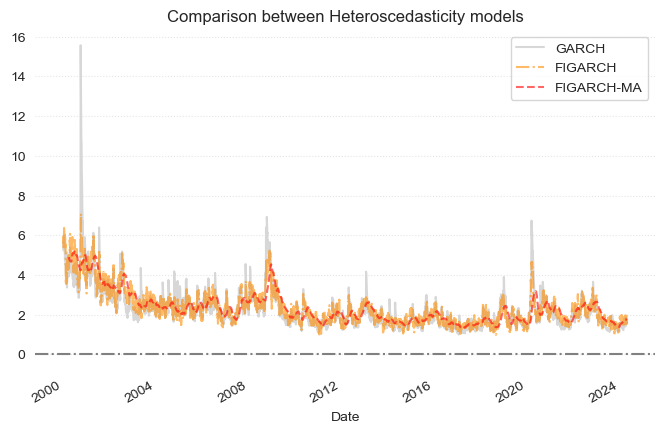

In [61]:
fig, ax = plt.subplots(figsize = (8, 5))
garch_fit.conditional_volatility.plot(
    ax = ax, 
    color = 'lightgray', 
    alpha = 0.9,
    label = 'GARCH'
)
figarch_fit.conditional_volatility.plot(
    ax = ax, 
    color = 'darkorange', 
    alpha = 0.6, 
    ls = '-.',
    label = 'FIGARCH'
)
figarch_fit.conditional_volatility.rolling(window = 60).mean().plot(
    ax = ax,
    color = 'red',
    alpha = 0.6,
    ls = '--',
    label = 'FIGARCH-MA'
)
plt.title('Comparison between Heteroscedasticity models')
plt.grid(False)
plt.legend()
plt.axhline(0, ls = '-.', color = 'gray')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.show()

GARCH에 비해서 변동성이 더 작게 추정되는 경향이 있다. 변동성에 long memory가 있으니, 단기간에 급격히 튀는 지점을 어느정도 보정해주는 역할을 한다